# **Customer Personality Prediction or Analysis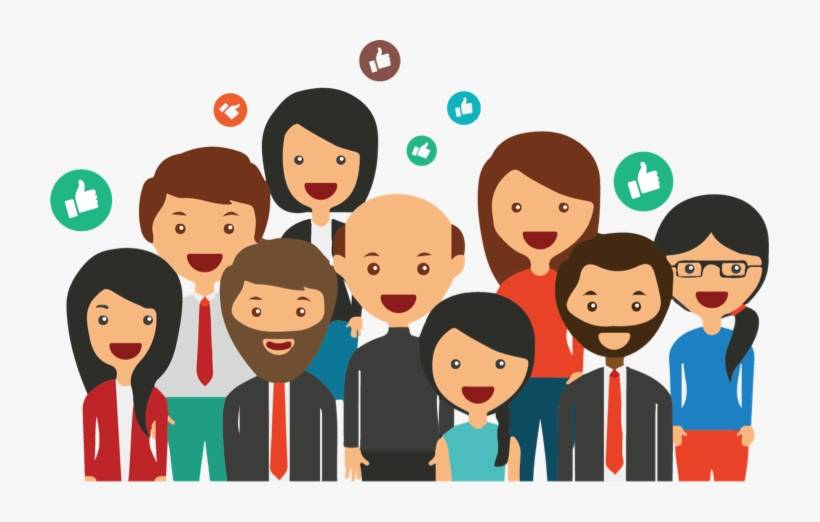**

# Import what we neeed for this work ::

In [634]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 
import seaborn as sns
import scipy
import random
import math
import dabl
from scipy.stats.mstats import winsorize
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import svm

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline


In [635]:
from IPython.display import clear_output
!pip install dabl
clear_output()

import dabl

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [636]:
from IPython.display import clear_output
!pip install dabl
clear_output()



```
# This is formatted as code
```

**Add Google Drive in colab :**

---



In [637]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Adding CSV data file from google drive :    

In [638]:
data = pd.read_csv('/content/drive/MyDrive/machine learning Lab Project/customer.csv')
data_copy = data.copy()

Reading that CSV file :

In [639]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


Showing Head of data file :

In [640]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Showing Tail of CSV data :

In [641]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


Seeing Data information :

In [642]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [643]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [644]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Data Clearing Work :

In [645]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [646]:
dabl_data=dabl.clean(data, verbose=1 )

Detected feature types:
continuous      10
dirty_float      0
low_card_int     5
categorical      9
date             1
free_string      0
useless          4
dtype: int64


In [647]:
types = dabl.detect_types(dabl_data)
types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
ID,True,False,False,False,False,False,False
Year_Birth,True,False,False,False,False,False,False
Education,False,False,False,True,False,False,False
Marital_Status,False,False,False,True,False,False,False
Income,True,False,False,False,False,False,False
Kidhome,False,False,False,True,False,False,False
Teenhome,False,False,False,True,False,False,False
Dt_Customer,False,False,False,False,True,False,False
Recency,True,False,False,False,False,False,False
MntWines,True,False,False,False,False,False,False


In [648]:
Target ="Response"
ID="ID"

In [649]:
X = data.drop([ID,Target],axis=1)
Y = data[Target]

In [650]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [651]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Model Train here : 

In [696]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4, random_state=45,stratify=Y)

In [697]:
print(X_train.shape,X_test.shape)

(1344, 24) (896, 24)


In [698]:
print(Y_train.shape,Y_test.shape)

(1344,) (896,)


In [699]:
train = pd.concat([X_train,Y_train], axis=1)

In [700]:
train.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Relationship,Marital_Status_Single,Response
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.037037,0.035714,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.074074,0.000000,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.185185,0.107143,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN
5,0.091412,0.0,0.5,0.161616,0.348292,0.211055,0.056812,0.000000,0.159696,0.038674,0.222222,0.142857,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN


## Data Testing : 

In [657]:
Test = dabl.SimpleClassifier(random_state=42).fit(train, target_col=Target) 

Running DummyClassifier()
accuracy: 0.851 average_precision: 0.149 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.460
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.851 average_precision: 0.149 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.460

Running GaussianNB()
accuracy: 0.179 average_precision: 0.154 roc_auc: 0.519 recall_macro: 0.503 f1_macro: 0.169
=== new best GaussianNB() (using recall_macro):
accuracy: 0.179 average_precision: 0.154 roc_auc: 0.519 recall_macro: 0.503 f1_macro: 0.169

Running MultinomialNB()
accuracy: 0.837 average_precision: 0.463 roc_auc: 0.775 recall_macro: 0.677 f1_macro: 0.676
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.837 average_precision: 0.463 roc_auc: 0.775 recall_macro: 0.677 f1_macro: 0.676

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.533 average_precision: 0.189 roc_auc: 0.604 recall_macro: 0.604 f1_macro: 0.458
Running DecisionTreeClassifier(class_weight='balanced', max_d

In [658]:
Test.current_best_

accuracy             0.804317
average_precision    0.562302
roc_auc              0.849845
recall_macro         0.779855
f1_macro             0.704151
Name: LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000), dtype: float64

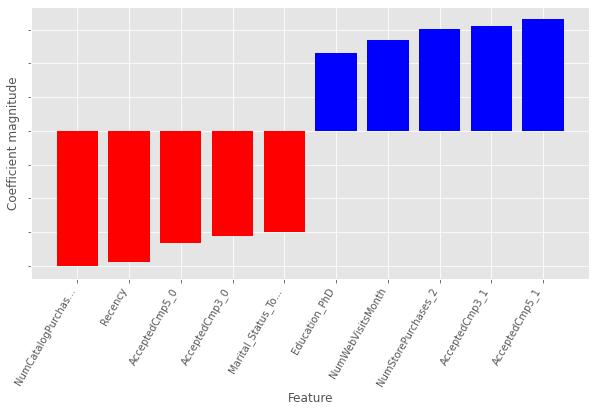

In [659]:
dabl.explain(Test) 

In [660]:
Test.est_

Pipeline(steps=[('easypreprocessor',
                 EasyPreprocessor(types=                     continuous  dirty_float  ...  free_string  useless
Year_Birth                 True        False  ...        False    False
Education                 False        False  ...        False    False
Marital_Status            False        False  ...        False    False
Income                     True        False  ...        False    False
Kidhome                   False        False  ...        False    False
Teenhome                  False        False  ...        False    False
Dt_Customer               False        False  ...        False    False
Recency                    True        False  ...        False    F...
AcceptedCmp4              False        False  ...        False    False
AcceptedCmp5              False        False  ...        False    False
AcceptedCmp1              False        False  ...        False    False
AcceptedCmp2              False        False  ...        Fal

## Data Visualization

In [661]:
data = data.set_index('ID')

In [662]:
data['Age'] = int(pd.datetime.now().year) - data['Year_Birth']
data_copy['Age'] = int(pd.datetime.now().year) - data_copy['Year_Birth']

In [663]:
print("Columns with string datatype are:")
for col in data.columns:
    if data[col].dtypes == object:
        print(col)

Columns with string datatype are:
Education
Marital_Status
Dt_Customer


In [664]:
data_Edu = pd.DataFrame(data['Education'].value_counts()).reset_index()
data_Edu.columns = ['Education', 'Count']

In [665]:
data['Education'] = np.where(data['Education'] == '2n Cycle', 'Master', data['Education'])

In [666]:
data_Edu = pd.DataFrame(data['Education'].value_counts()).reset_index()
data_Edu.columns = ['Education', 'Count']

fig = px.bar(data_Edu,
            x='Education',
            y='Count',
            color='Education')
fig.update_layout(width=800, height=400, title='Education ')
fig.show()

Text(0.5, 1.0, 'Customers Birth Year Distrubiton')

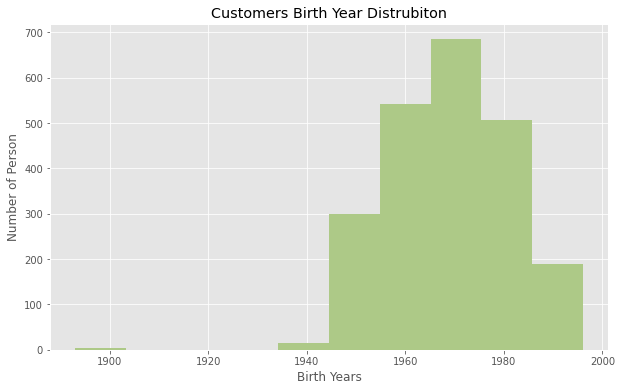

In [667]:
fig = plt.figure(figsize=(10,6))

plt.hist(data.Year_Birth, color='#adc987')
plt.ylabel('Number of Person')
plt.xlabel('Birth Years')
plt.title('Customers Birth Year Distrubiton')

In [668]:
data_Mar = pd.DataFrame(data['Marital_Status'].value_counts()).reset_index()
data_Mar.columns = ['Marital_Status', 'Count']
data_Mar

,Marital_Status,Count
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


In [669]:
mar_stat = ['Single', 'Widow', 'Alone', 'Absurd', 'YOLO']
data['Marital_Status'] = np.where(data['Marital_Status'].isin(mar_stat), 'Single', data['Marital_Status'])
data['Marital_Status'] = np.where(data['Marital_Status'].isin(['Married', 'Together']), 'Relationship', 'Single')
data_Mar = pd.DataFrame(data['Marital_Status'].value_counts()).reset_index()
data_Mar.columns = ['Marital_Status', 'Count']
data_Mar

,Marital_Status,Count
0,Relationship,1444
1,Single,796


In [670]:
data_Edu = pd.DataFrame(data['Marital_Status'].value_counts()).reset_index()
data_Edu.columns = ['Marital_Status', 'Count']

fig = px.bar(data_Edu,
            x='Marital_Status',
            y='Count',
            color='Marital_Status')
fig.update_layout(width=800, height=400, title='Relation ')
fig.show()

In [671]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], utc=False)


In [672]:
print(f"The youngest customer is {data['Age'].min()} years old and oldest customer is {data['Age'].max()} years old")

The youngest customer is 25 years old and oldest customer is 128 years old


In [673]:
data.isna().sum()[lambda x: x>0]

Income    24
dtype: int64

In [674]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

In [675]:
age_data = data.groupby(by = ['Year_Birth']).agg({'Income':'mean'}).reset_index()
age_data['Year_Birth'] = 2021 - age_data['Year_Birth'] 

In [676]:
fig = px.bar(age_data, x = 'Year_Birth', y = 'Income')
fig.update_layout(height=400, width=700, title_text="Age Vs Average Income")
fig.show()

## Shopping Products Selling Prediction :

In [677]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [678]:
def create_interval_column(age_data, interval):
    inter = []
    interval = interval
    j = 0
    while (j<100):
        j = j + interval
        inter.append(j)
    interval_column = [] 
    for i in age_data['Year_Birth']:
        for j in range(len(inter)-1):
            if inter[j]<i <=inter[j+1]:
                interval_column.append(str(inter[j]) + '-' + str(inter[j+1]))
                break
    return interval_column

interval_you_want_to_plot = 10 

columns_to_be_analyzed = ['MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

age_data = data.groupby(by = ['Year_Birth']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum',
                                              'MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()
age_data['Year_Birth'] = 2021 - age_data['Year_Birth'] 
age_data.drop([0,1,2], axis = 0, inplace=True)

interval_column = create_interval_column(age_data, interval=interval_you_want_to_plot )# Creating interval of 5

age_data['Interval_column'] = interval_column

fig = make_subplots(rows = 3, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Bar(x = age_data['Interval_column'].to_numpy(), 
                             y = age_data[columns_to_be_analyzed[cnt]].to_numpy()), 
                    row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Amount of quantity',font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"),
                 showlegend=False,autosize=True,
                  width=1200,
                  height=800)
fig.show()

In [679]:
Edu_data = data.groupby(by = ['Education']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum',
                                              'MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()

fig = make_subplots(rows = 3, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Bar(x = Edu_data['Education'].to_numpy(), 
                             y = Edu_data[columns_to_be_analyzed[cnt]].to_numpy()), row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Amount of quantity',font=dict(
        family="Courier New, monospace", size=12, color="#7f7f7f"), showlegend=False,autosize=True,width=1200,height=800)
fig.show()

In [680]:

Marital_data = data.groupby(by = ['Marital_Status']).agg({'MntWines':'sum','MntFruits':'sum' ,'MntMeatProducts':'sum',
                                              'MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum' }).reset_index()

fig = make_subplots(rows = 3, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Bar(x = Marital_data['Marital_Status'].to_numpy(), 
                             y = Marital_data[columns_to_be_analyzed[cnt]].to_numpy()), row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Amount of quantity',font=dict(
        family="Courier New, monospace", size=12, color="#7f7f7f"), showlegend=False,autosize=True,width=1200,height=800)
fig.show()

In [681]:
interval_you_want_to_plot = 10 

columns_to_be_analyzed = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

age_data = data.groupby(by = ['Year_Birth']).agg({'NumDealsPurchases':'sum','NumWebPurchases':'sum' ,'NumCatalogPurchases':'sum',
                                              'NumStorePurchases':'sum', 'NumWebVisitsMonth':'sum' }).reset_index()
age_data['Year_Birth'] = 2021 - age_data['Year_Birth'] 
age_data.drop([0,1,2], axis = 0, inplace=True)

interval_column = create_interval_column(age_data, interval=interval_you_want_to_plot )# Creating interval of 5

age_data['Interval_column'] = interval_column

fig = make_subplots(rows = 2, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        if cnt == 5 :
          break
        fig.add_trace(go.Bar(x = age_data['Interval_column'].to_numpy(), 
                             y = age_data[columns_to_be_analyzed[cnt]].to_numpy()), row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Number of Purchase',font=dict(
        family="Courier New, monospace",size=12,color="#7f7f7f"),showlegend=False,autosize=True,width=1200,height=800)
fig.show()

In [682]:
Edu_data = data.groupby(by = ['Education']).agg({'NumDealsPurchases':'sum','NumWebPurchases':'sum' ,'NumCatalogPurchases':'sum',
                                              'NumStorePurchases':'sum', 'NumWebVisitsMonth':'sum' }).reset_index()

fig = make_subplots(rows = 2, cols = 3, subplot_titles=columns_to_be_analyzed)
cnt = 0
for i in range(2):
    for j in range(3):
        if cnt == 5 :
          break
        fig.add_trace(go.Bar(x = Edu_data['Education'].to_numpy(), 
                             y = Edu_data[columns_to_be_analyzed[cnt]].to_numpy()), row = i+1, col=j+1 )
        cnt+=1
fig.update_layout(  title = 'Columns Vs Number of Purchase',font=dict(
        family="Courier New, monospace",size=12,color="#7f7f7f"),showlegend=False,autosize=True,width=1200,height=800)
fig.show()

In [683]:
PALETTE = sns.color_palette("Set2")

In [684]:
num = data.filter(regex='Num[^Deals].+Purchases').sum(axis=0)

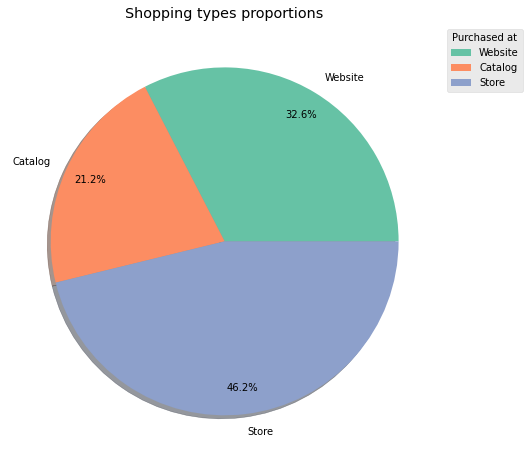

In [685]:
sizes = dict(num)

plt.figure(figsize=(12, 8))
plt.title("Shopping types proportions")
plt.pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Purchased at", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1))

plt.show()

Text(0.5, 1.0, 'Web vs Store Pruchases According to Age')

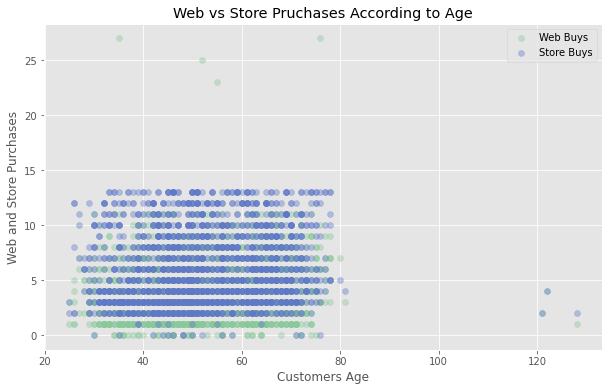

In [686]:
fig = plt.figure(figsize=(10,6))

plt.scatter(data.Age, data.NumWebPurchases, color='#88c999', alpha=0.4, label='Web Buys')
plt.scatter(data.Age, data.NumStorePurchases, color='#5f79c9', alpha=0.4, label='Store Buys')

plt.legend()

plt.ylabel('Web and Store Purchases')
plt.xlabel('Customers Age')
plt.title('Web vs Store Pruchases According to Age')

# Customer Offer Acceptance Prediction

In [687]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

In [688]:
# Selected Columns
features=['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Education', 'Marital_Status']
target='Response'
# X & Y
X=data[features]
Y=data[target]

In [689]:
# Data Cleaning
def NullClearner(value):
	if(isinstance(value, pd.Series) and (value.dtype in ['float64','int64'])):
		value.fillna(value.mean(),inplace=True)
		return value
	elif(isinstance(value, pd.Series)):
		value.fillna(value.mode()[0],inplace=True)
		return value
	else:return value
x=X.columns.to_list()
for i in x:
	X[i]=NullClearner(X[i])
Y=NullClearner(Y)

In [690]:
# Handling AlphaNumeric Features
X=pd.get_dummies(X)

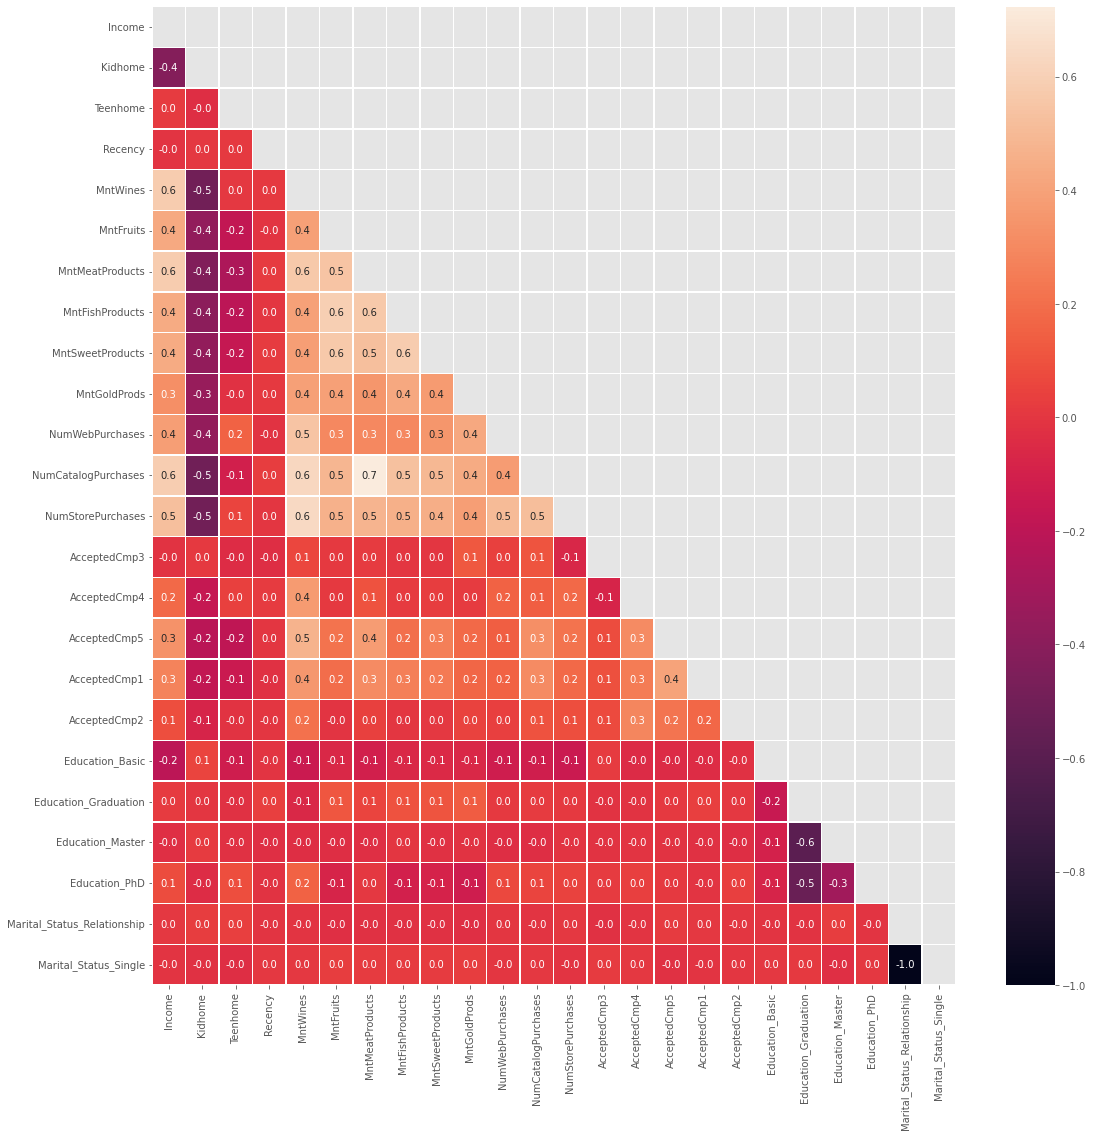

In [691]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

In [692]:
columns=X.columns
X=MinMaxScaler().fit_transform(X)
X=pd.DataFrame(data = X,columns = columns)
X.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Relationship,Marital_Status_Single
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.296296,0.357143,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.037037,0.035714,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.296296,0.071429,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.074074,0.000000,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.185185,0.107143,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [693]:
# Data split for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [694]:
#Model Parameters
param={'C': 1, 'loss': 'squared_hinge', 'tol': 0.05092207964551096, 'penalty': 'l2'}
# Model Initialization
model=LinearSVC(**param)
model.fit(X_train,Y_train)

LinearSVC(C=1, tol=0.05092207964551096)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       382
           1       0.74      0.39      0.51        66

    accuracy                           0.89       448
   macro avg       0.82      0.69      0.73       448
weighted avg       0.88      0.89      0.88       448



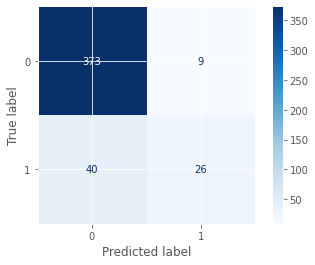

In [695]:
# Confusion Matrix
plot_confusion_matrix(model,X_test,Y_test,cmap=plt.cm.Blues)
# Classification Report
print(classification_report(Y_test,model.predict(X_test)))